# Feature Detection

#### The SIFT & SURF algorithms are patented by their respective creators, and while they are free to use in academic and research settings, you should technically be obtaining a license/permission from the creators if you are using them in a commercial (i.e. for-profit) application.

## SIFT

http://www.inf.fu-berlin.de/lehre/SS09/CV/uebungen/uebung09/SIFT.pdf

Scale Invariant Feature Transform (SIFT) is an image descriptor for image-based matching and recognition developed by David Lowe (1999, 2004).
- invariant to translations, rotations and scaling transformations in the image domain and robust to moderate perspective transformations and illumination variations.
- comprised a method for detecting interest points from a grey-level image at which statistics of local gradient directions of image intensities were accumulated to give a summarizing description of the local image structures in a local neighbourhood around each interest point, with the intention that this descriptor should be used for matching corresponding interest points between different images.
- also been applied at dense grids (dense SIFT) which have been shown to lead to better performance for tasks such as object categorization, texture classification, image alignment and biometrics .

Original


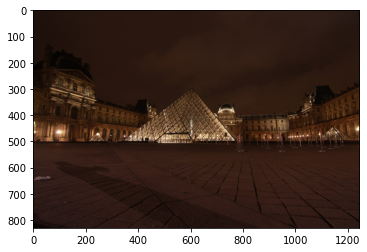

Number of keypoints Detected:  1891
Feature Method - SIFT


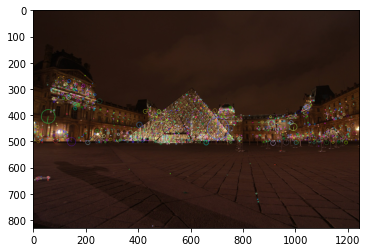

In [7]:
import cv2
import numpy as np
from show import show
image = cv2.imread('images/input.jpg')
show("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Create SIFT Feature Detector object
sift = cv2.xfeatures2d.SIFT_create()
#Detect key points
keypoints = sift.detect(gray, None)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich key points on input image
image = cv2.drawKeypoints(image, keypoints,outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - SIFT', image)
show('Feature Method - SIFT', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## SURF

http://www.vision.ee.ethz.ch/~surf/eccv06.pdf

SURF  stands for Speeded Up Robust Features.
- extracts  some unique keypoints and descriptors from an image.  
- SURF uses an intermediate image representation called Integral Image, which is computed from the input image and is used to speed up the calculations in any rectangular area. 
- It is formed by summing up the pixel values of the x,y co-ordinates from origin to the end of the image. 
- makes computation time invariant to change in size and is particularly useful while encountering large images. 
- based on the determinant of the Hessian matrix. 
- describes how pixel intensities are distributed within a scale dependent neighborhood of each interest point detected by Fast Hessian

Original


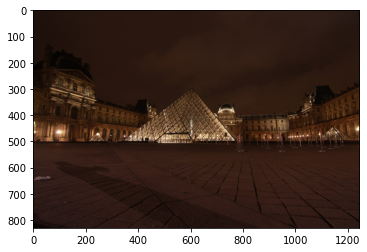

error: OpenCV(4.3.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


In [11]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')
show("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Create SURF Feature Detector object
surf = cv2.xfeatures2d.SURF_create()

# Only features, whose hessian is larger than hessianThreshold are retained by the detector
surf.hessianThreshold = 500
keypoints, descriptors = surf.detectAndCompute(gray, None)
print ("Number of keypoints Detected: ", len(keypoints))

# Draw rich key points on input image
image = cv2.drawKeypoints(image, keypoints,outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - SURF', image)
show('Feature Method - SURF', image)
cv2.waitKey()
cv2.destroyAllWindows()

## FAST

https://www.edwardrosten.com/work/rosten_2006_machine.pdf
http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV1011/AV1FeaturefromAcceleratedSegmentTest.pdf

Original


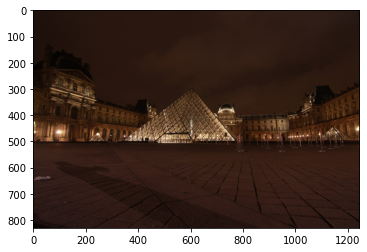

In [ ]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')
show("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create FAST Detector object
fast = cv2.FastFeatureDetector()

# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints = fast.detect(gray, None)
print ("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image, keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - FAST', image)
show('Feature Method - FAST', image)
cv2.waitKey()
cv2.destroyAllWindows()

## BRIEF

http://cvlabwww.epfl.ch/~lepetit/papers/calonder_pami11.pdf

In [2]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')
show("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create FAST detector object
fast = cv2.FastFeatureDetector()

# Create BRIEF extractor object
brief = cv2.DescriptorExtractor_create("BRIEF")

# Determine key points
keypoints = fast.detect(gray, None)

# Obtain descriptors and new final keypoints using BRIEF
keypoints, descriptors = brief.compute(gray, keypoints)
print ("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image, keypoints, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                                    
cv2.imshow('Feature Method - BRIEF', image)
show('Feature Method - BRIEF', image)
cv2.waitKey()
cv2.destroyAllWindows()

NameError: name 'show' is not defined

## Oriented FAST and Rotated BRIEF (ORB)
http://www.willowgarage.com/sites/default/files/orb_final.pdf

In [17]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')
show("Original", image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create ORB object, we can specify the number of key points we desire
orb = cv2.ORB()

# Determine key points
keypoints = orb.detect(gray, None)

# Obtain the descriptors
keypoints, descriptors = orb.compute(gray, keypoints)
print("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
image = cv2.drawKeypoints(image, keypoints,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - ORB', image)
show('Feature Method - ORB', image)
cv2.waitKey()
cv2.destroyAllWindows()

('Number of keypoints Detected: ', 500)
